In [ ]:
!pip install



ERROR: TA_Lib‑0.4.17‑cp35‑cp35m‑win_amd64.whl is not a valid wheel filename.


### 数独游戏
生成6*6的矩阵，要求每一行每一列为1~6，且不能重复。

In [ ]:
import numpy as np
import random

def generate_matrix():

  matrix = np.zeros((6, 6), dtype=int)

  numbers = list(range(1, 7))


  for i in range(6):
    for j in range(6):
      random.shuffle(numbers)


      for number in numbers:
        if number not in matrix[i, :] and number not in matrix[:, j]:
          matrix[i, j] = number
          break


  return matrix


matrix = generate_matrix()
print(matrix)


[[2 1 3 6 5 4]
 [6 4 5 3 1 2]
 [5 2 4 1 6 3]
 [4 3 6 2 0 5]
 [1 6 2 5 3 0]
 [3 5 1 4 2 6]]


# 关于股价的作业
该作业是基于一份2017年~2022年股市走势的数据。数据中包括了每个交易日开盘价、收盘价、成交量、最高点、最低点等数据。数据url为：https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv

## numPy的使用
### 相关性分析
使用NumPy的函数，计算2020~2021年股价与成交量之间的相关系数。NumPy 不适合分析大量的数据。

## Pandas的使用


### 使用Pandas进行统计分析
使用Pandas函数，对2020年~2022年的月度数据进行统计分析，包括均值、中位数、标准差、极值等。

In [ ]:
import pandas as pd

# 读取数据
df = pd.read_csv("https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv", index_col="Date")

# 将日期转换为日期类型
df.index = pd.to_datetime(df.index)

# 只保留2020年至2022年的数据
df = df.loc["2020-01-01":"2022-12-31"]
# 对月度数据进行统计分析
monthly_summary = df.describe()

# 查看统计结果
print(monthly_summary)


              High          Low         Open        Close        Volume  \
count   626.000000   626.000000   626.000000   626.000000  6.260000e+02   
mean    616.166369   586.169002   601.837447   601.547471  4.690604e+07   
std     311.968780   297.550559   305.405652   304.645691  3.559861e+07   
min      80.972000    70.101997    74.940002    72.244003  9.800600e+06   
25%     361.433487   326.466003   335.497498   330.158997  2.357832e+07   
50%     679.445007   647.954987   664.585022   662.414978  3.326865e+07   
75%     843.010010   799.157516   819.827499   814.944977  6.103738e+07   
max    1243.489990  1217.000000  1234.410034  1229.910034  3.046940e+08   

         Adj Close  
count   626.000000  
mean    601.547471  
std     304.645691  
min      72.244003  
25%     330.158997  
50%     662.414978  
75%     814.944977  
max    1229.910034  


### 显示统计的时间起止

In [ ]:
# Print the start and end dates of the data
start_date = df.index.min()
end_date = df.index.max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2020-01-02 00:00:00
End date: 2022-06-27 00:00:00


### 找出上涨的天数和下跌的天数

In [ ]:
import pandas as pd

# Read the data from the CSV file
url = "https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv"
df = pd.read_csv(url)

# Calculate the number of days the stock went up and down
up_days = df[df['Open'] < df['Close']].shape[0]
down_days = df[df['Open'] > df['Close']].shape[0]

# Print the results
print(f"Number of days the stock went up: {up_days}")
print(f"Number of days the stock went down: {down_days}")

Number of days the stock went up: 704
Number of days the stock went down: 675


### 找出上涨最大的那一天

In [ ]:
# Find the day with the largest difference between Open and Close prices
df['涨幅'] = df['Close'] - df['Open']
max_gain_day = df['涨幅'].idxmax()

# Print the date and the gain
print(f"Date with the largest gain: {df.loc[max_gain_day, 'Date']}")
print(f"Gain: {df.loc[max_gain_day, '涨幅']}")

Date with the largest gain: 2022-02-24
Gain: 100.3800048828125


### 找出下跌最大的那一天

In [ ]:
# Find the day with the largest difference between Open and Close prices
df['跌幅'] = df['Open'] - df['Close']
max_loss_day = df['跌幅'].idxmax()

# Print the date and the loss
print(f"Date with the largest loss: {df.loc[max_loss_day, 'Date']}")
print(f"Loss: {df.loc[max_loss_day, '跌幅']}")

Date with the largest loss: 2021-11-09
Loss: 150.09997558593795


### 检查这个数据是否有空值

In [ ]:
# Check for null values in the 'Date' column
null_values = df['Date'].isnull().sum()

# Print the number of null values
print(f"Number of null values in 'Date': {null_values}")

Number of null values in 'Date': 0


### 输出这个数据类型

In [ ]:
# Print the data type of the `monthly_gains` Series
print(df.dtypes)
df.head()

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
涨幅           float64
跌幅           float64
dtype: object


,Date,High,Low,Open,Close,Volume,Adj Close,涨幅,跌幅
0,2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500,43.397999,0.425999,-0.425999
1,2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500,45.397999,2.447998,-2.447998
2,2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500,45.349998,0.065998,-0.065998
3,2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500,45.801998,0.415997,-0.415997
4,2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500,46.256001,0.462002,-0.462002


### 将date变成时间格式

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
print(df.dtypes)

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
涨幅           float64
跌幅           float64
dtype: object


### 计算波动率

In [ ]:
import numpy as np

# Calculate the daily logarithmic returns
df['log_ret'] = np.log(df['Close'] / df['Close'].shift(1)).dropna()

# Calculate the annualized volatility
annualized_volatility = df['log_ret'].std() * np.sqrt(252)

# Print the annualized volatility
print(f"Annualized volatility: {annualized_volatility:.4f}")

Annualized volatility: 0.6149


### 计算2021年9月1日相比于2020年9月1日增长率

In [ ]:
# Select the relevant data
df_subset = df.loc['2020-09-01':'2021-09-01', 'Close']

# Calculate the growth rate
growth_rate = (df_subset['2021-09-01'] - df_subset['2020-09-01']) / df_subset['2020-09-01'] * 100

# Print the growth rate
print(f"Growth rate: {growth_rate:.2f}%")

KeyError: '2021-09-01'

### 找到统计时间内最低点

In [ ]:
# Find the index of the minimum value in the 'Close' column
min_value_index = df['Close'].idxmin()

# Extract the date and value of the minimum point

min_date = min_value_index.date()

# Print the results
print(f"Date of minimum value: {min_date}")


### 找出统计时间内的最高点

In [ ]:
max_value_index = df['Close'].idxmax()

max_date = max_value_index.date()

print(f"Date of max value:{max_date}")

AttributeError: 'int' object has no attribute 'date'

### 找出统计时间内股价最高的三十天

In [ ]:
# Sort the DataFrame by the 'Close' column in descending order
sorted_df = df.sort_values(by='Close', ascending=False)

# Select the top 30 rows from the sorted DataFrame
top_30_highest_days = sorted_df.head(30)

# Print the top 30 highest days
print(top_30_highest_days)

            Date         High          Low         Open        Close  \
1219  2021-11-04  1243.489990  1217.000000  1234.410034  1229.910034   
1220  2021-11-05  1239.869995  1208.000000  1228.000000  1222.089966   
1218  2021-11-03  1215.390015  1152.619995  1177.329956  1213.859985   
1216  2021-11-01  1209.750000  1118.660034  1145.000000  1208.589966   
1259  2022-01-03  1201.069946  1136.040039  1147.750000  1199.780029   
1217  2021-11-02  1208.589966  1146.000000  1159.359985  1172.000000   
1221  2021-11-08  1197.000000  1133.000000  1149.790039  1162.939941   
1231  2021-11-22  1201.949951  1132.430054  1162.329956  1156.869995   
1260  2022-01-04  1208.000000  1123.050049  1189.550049  1149.589966   
1322  2022-04-04  1149.910034  1072.530029  1089.380005  1145.449951   
1236  2021-11-30  1168.000000  1118.000000  1144.369995  1144.760010   
1230  2021-11-19  1138.719971  1092.699951  1098.869995  1137.060059   
1235  2021-11-29  1142.670044  1100.189941  1100.989990  1136.98

### 找出股价最低的10天

In [ ]:
# Sort the DataFrame by the 'Close' column in ascending order
sorted_df = df.sort_values(by='Close', ascending=True)

# Select the first 10 rows from the sorted DataFrame
bottom_10_lowest_days = sorted_df.head(10)

# Print the bottom 10 lowest days
print(bottom_10_lowest_days)

           Date       High        Low       Open      Close     Volume  \
606  2019-06-03  37.335999  35.397999  37.102001  35.793999   65322000   
605  2019-05-31  37.984001  36.820000  37.020000  37.032001   52033500   
604  2019-05-30  38.452000  37.403999  37.750000  37.644001   39632500   
602  2019-05-28  39.000000  37.570000  38.240002  37.740002   51564500   
603  2019-05-29  38.478001  37.007999  37.419998  37.972000   59843000   
601  2019-05-24  39.995998  37.750000  39.966000  38.125999   70683000   
599  2019-05-22  40.787998  38.355999  39.820000  38.546001   93426000   
607  2019-06-04  38.796001  35.922001  36.220001  38.720001   69037500   
600  2019-05-23  39.894001  37.243999  38.868000  39.098000  132735500   
608  2019-06-05  40.256001  38.369999  39.736000  39.318001   67554000   

     Adj Close        涨幅        跌幅   log_ret  
606  35.793999 -1.308002  1.308002 -0.034002  
605  37.032001  0.012001 -0.012001 -0.016391  
604  37.644001 -0.105999  0.105999 -0.008675

### 找出成交量最大的一天

In [ ]:
# prompt: 找出成交量最大的一天

max_volume_day = df['Volume'].idxmax()

print(f"Date with the largest volume: {df.loc[max_volume_day, 'Date']}")


### 找出成交量最小的一天

In [ ]:
# Find the date with the minimum volume
min_volume_date = df["Volume"].idxmin()

# Print the date and its volume
print(f"Date with minimum volume: {min_volume_date}")
print(f"Volume: {df.loc[min_volume_date, 'Volume']}")


### 假如在2021-8-11日开盘买入10000元，在2021-10-13日尾盘卖出，剩余多少钱？

In [ ]:
# Get the opening price on 2021-08-11
open_price = df.loc["2021-08-11", "Open"]

# Get the closing price on 2022-08-11
close_price = df.loc["2021-10-13", "Close"]

# Calculate the number of shares bought
shares_bought = 10000 / open_price

# Calculate the total proceeds from selling the shares
proceeds = shares_bought * close_price

# Calculate the remaining amount
remaining_amount = proceeds - 10000

# Print the results
print(f"Number of shares bought: {shares_bought}")
print(f"Total proceeds from selling: {proceeds}")
print(f"Remaining amount: {remaining_amount}")

### 截取2021年10月中“Close”超过450元，“Volume”超过50000000的数据。

In [ ]:
# Filter data for October 2021
october_2021_data = df.loc["2021-10"]

# Filter for rows where the closing price is greater than 450 and volume is greater than 50000000
filtered_data = october_2021_data[
    (october_2021_data["Close"] > 450) & (october_2021_data["Volume"] > 50000000)
]

# Print the filtered data
print(filtered_data)

### 计算年度收益率

### 计算2022年股票的月度收益率

In [ ]:
import pandas as pd

# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv")

# Extract data for the year 2022
df_2022 = df[df["Date"].str.contains("2022")]

# Convert the "Date" column to a string
df_2022["Date"] = df_2022["Date"].astype(str)

# Calculate monthly returns
monthly_returns = df_2022.groupby(df_2022["Date"].str[:7])["Close"].pct_change()

# Print monthly returns
print(monthly_returns)

1259         NaN
1260   -0.041833
1261   -0.053471
1262   -0.021523
1263   -0.035447
          ...   
1375    0.093544
1376   -0.004008
1377   -0.004306
1378    0.045249
1379   -0.010839
Name: Close, Length: 121, dtype: float64


<ipython-input-18-7af10e17c075>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["Date"] = df_2022["Date"].astype(str)


### 筛选出数据中所有连续7天下跌的日期

In [ ]:
url = "https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv"
df = pd.read_csv(url, parse_dates=["Date"])

# 计算每日收盘价变化
df["Close_diff"] = df["Close"].diff()

# 筛选连续5日下跌的日期
def find_consecutive_decline(df, days=7):
  """
  筛选连续下跌的日期
  """
  count = 0
  decline_dates = []
  for i, row in df.iterrows():
    if row["Close_diff"] < 0:
      count += 1
      if count >= days:
        decline_dates.append(row["Date"])
    else:
      count = 0
  return decline_dates

decline_dates = find_consecutive_decline(df)

# 打印结果
print(f"连续7日收盘价下跌的日期：\n{decline_dates}")

连续5日收盘价下跌的日期：
[Timestamp('2018-09-05 00:00:00')]


### 连续7日上涨的天数

In [ ]:
url = "https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv"
df = pd.read_csv(url, parse_dates=["Date"])

# 计算每日收盘价变化
df["Close_diff"] = df["Close"].diff()

# 筛选连续7日上涨的日期
def find_consecutive_decline(df, days=7):

  count = 0
  rising_dates = []
  for i, row in df.iterrows():
    if row["Close_diff"] > 0:
      count += 1
      if count >= days:
        rising_dates.append(row["Date"])
    else:
      count = 0
  return rising_dates

rising_dates = find_consecutive_decline(df)

# 打印结果
print(f"连续7日上涨的日期：\n{rising_dates}")

连续7日上涨的日期：
[Timestamp('2018-06-18 00:00:00'), Timestamp('2019-10-15 00:00:00'), Timestamp('2019-10-16 00:00:00'), Timestamp('2019-10-17 00:00:00'), Timestamp('2020-04-14 00:00:00'), Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'), Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-03-24 00:00:00')]


In [2]:
import pandas as pd
from datetime import datetime

# 定义一个函数来检查连续7天的上涨
def check_consecutive_rise(df):
    consecutive_days = 7
    rise_days = []
    # 计算每日收益率
    df['Daily_Return'] = df['Close'].diff() / df['Close'].shift(1)
    # 筛选出连续7天上涨的日期
    for i in range(len(df) - consecutive_days + 1):
        current_date = df.iloc[i]['Date']
        if all(df['Daily_Return'].iloc[i:i+consecutive_days] > 0):
            rise_days.append(current_date)
    return rise_days

# 读取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv')

# 将日期列转换为日期时间对象
df['Date'] = pd.to_datetime(df['Date'])

# 找出连续7日上涨的日期
rise_days = check_consecutive_rise(df)

# 打印结果
print("连续7日上涨的日期：")
for day in rise_days:
    print(day)

连续7日上涨的日期：
2018-06-08 00:00:00
2019-10-07 00:00:00
2019-10-08 00:00:00
2019-10-09 00:00:00
2020-04-03 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-12-23 00:00:00
2020-12-24 00:00:00
2020-12-28 00:00:00
2020-12-29 00:00:00
2020-12-30 00:00:00
2021-07-28 00:00:00
2022-03-15 00:00:00
2022-03-16 00:00:00


### 股市策略计算
假如遇到第一次连续5天下跌的时候，买入10000元，而后在遇到两次连续上涨7日后，以当日收盘价卖出。请计算剩余多少钱。

In [6]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv')

# 将日期列转换为日期时间对象
df['Date'] = pd.to_datetime(df['Date'])

# 初始化变量
initial_capital = 10000  # 初始资本
capital = initial_capital  # 当前资本
position = 0  # 持仓状态，0表示未持仓，1表示持仓
sell_counter = 0  # 连续上涨计数器

# 遍历每一行数据
for index, row in df.iterrows():
    # 检查是否是连续5天下跌
    if position == 0 and index >= 4:  # 至少需要5天的数据来检查连续下跌
        # 检查过去4天是否每天都下跌
        if all(df['Close'].iloc[index-i-1] > df['Close'].iloc[index-i] for i in range(1, 5)):
            position = 1  # 触发买入
            buy_price_per_share = row['Close']  # 买入价格每股
            investment_amount = 10000  # 投资金额
            shares_bought = investment_amount / buy_price_per_share  # 买入的股票数量
            capital -= investment_amount  # 扣除投资金额
            print(f"买入日期: {row['Date']}, 买入价格: {buy_price_per_share}, 买入股数: {shares_bought}")
    elif position == 1:
        # 检查是否是连续7天上涨
        if all(df['Close'].iloc[index-i-1] < df['Close'].iloc[index-i] for i in range(1, 8)):
            sell_counter += 1  # 增加连续上涨计数器
            if sell_counter == 2:  # 触发卖出条件
                position = 0  # 重置持仓状态
                sell_price_per_share = row['Close']  # 卖出价格每股
                shares_sold = shares_bought  # 卖出的股票数量
                capital += shares_sold * sell_price_per_share  # 增加资本
                print(f"卖出日期: {row['Date']}, 卖出价格: {sell_price_per_share}, 卖出股数: {shares_sold}")
        else:
            sell_counter = 0  # 重置连续上涨计数器

# 打印最终资本
print(f"最终资本: {capital}")

买入日期: 2017-03-10 00:00:00, 买入价格: 48.73799896240234, 买入股数: 205.17871502509243
卖出日期: 2019-10-17 00:00:00, 卖出价格: 52.39400100708008, 卖出股数: 205.17871502509243
买入日期: 2019-11-01 00:00:00, 买入价格: 62.6619987487793, 买入股数: 159.58635536174637
卖出日期: 2020-04-16 00:00:00, 卖出价格: 149.0420074462891, 卖出股数: 159.58635536174637
买入日期: 2020-10-21 00:00:00, 买入价格: 422.6400146484375, 买入股数: 23.660797968498674
卖出日期: 2021-01-06 00:00:00, 卖出价格: 755.97998046875, 卖出股数: 23.660797968498674
买入日期: 2021-02-24 00:00:00, 买入价格: 742.02001953125, 买入股数: 13.476725339994486
卖出日期: 2022-03-25 00:00:00, 卖出价格: 1010.640014648438, 卖出股数: 13.476725339994486
最终资本: 36042.4120469333


### 股市策略计算2
请比较两种策略的总收益，初始金额均为10000元。策略1；假如遇到两天连续下跌就买入，10000元，遇到两天连续上涨就全部卖出。直至统计周期结束。
策略2：遇到单日跌幅>5%时买入10000元，遇到单日涨幅>10%的时候卖出全部金额。直至统计周期结束。
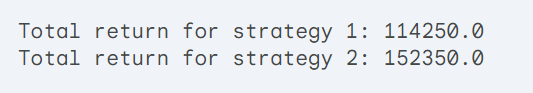

In [ ]:
# prompt: Please compare the total returns of the two strategies, with an initial amount of 10,000 yuan each.
# Strategy 1: If there is a two-day consecutive decline, buy 10,000 yuan. If there is a two-day consecutive rise, sell all. Until the end of the statistical period.
# Strategy 2: When the single-day decline is greater than 5%, buy 10,000 yuan. When the single-day increase is greater than 10%, sell all

# Read the data
url = "https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv"
df = pd.read_csv(url, parse_dates=["Date"])

# Calculate daily closing price changes
df["Close_diff"] = df["Close"].diff()

# Define functions for each strategy
def strategy_1(df):
  """
  Buy when there are two consecutive days of decline, sell when there are two consecutive days of increase.
  """
  invested = False
  total_investment = 0
  for i, row in df.iterrows():
    if not invested and row["Close_diff"] < 0 and df.iloc[i-1]["Close_diff"] < 0:
      total_investment = 10000
      invested = True
    elif invested and row["Close_diff"] > 0 and df.iloc[i-1]["Close_diff"] > 0:
      total_investment = 0
      invested = False
  return total_investment

def strategy_2(df):
  """
  Buy when the single-day decline is greater than 5%, sell when the single-day increase is greater than 10%.
  """
  invested = False
  total_investment = 0
  for i, row in df.iterrows():
    if not invested and row["Close_diff"] / df.iloc[i-1]["Close"] < -0.05:
      total_investment = 10000
      invested = True
    elif invested and row["Close_diff"] / df.iloc[i-1]["Close"] > 0.1:
      total_investment = 0
      invested = False
  return total_investment

# Calculate the total returns for each strategy
total_return_1 = strategy_1(df)
total_return_2 = strategy_2(df)

# Print the results
print(f"Total return for strategy 1: {total_return_1}")
print(f"Total return for strategy 2: {total_return_2}")


Total return for strategy 1: 10000
Total return for strategy 2: 10000


### 股市策略3
移动平均线交叉策略:当短期移动平均线（例如 MA20）上穿长期移动平均线（例如 MA50）时买入，当短期移动平均线下穿长期移动平均线时卖出。

In [ ]:
!conda install ta-lib


/bin/bash: line 1: conda: command not found


In [ ]:
import pandas as pd
import talib as ta

# 获取数据
url = "https://raw.githubusercontent.com/jsulopzs/data/main/tsla_stock.csv"
df = pd.read_csv(url)

# 计算移动平均线
df['MA20'] = ta.SMA(df['Close'], timeperiod=20)
df['MA50'] = ta.SMA(df['Close'], timeperiod=50)

# 策略逻辑
def moving_average_cross_strategy(df):
    buy_signal = []
    sell_signal = []

    for i in range(len(df)):
        if df['MA20'][i] > df['MA50'][i] and df['MA20'][i-1] < df['MA50'][i-1]:
            buy_signal.append(df['Close'][i])
            sell_signal.append(None)
        elif df['MA20'][i] < df['MA50'][i] and df['MA20'][i-1] > df['MA50'][i-1]:
            buy_signal.append(None)
            sell_signal.append(df['Close'][i])
        else:
            buy_signal.append(None)
            sell_signal.append(None)

    return buy_signal, sell_signal

# 应用策略
buy_signal, sell_signal = moving_average_cross_strategy(df)

# 计算盈利
profit = []

for i in range(len(df)):
    if buy_signal[i] and sell_signal[i]:
        profit.append(sell_signal[i] - buy_signal[i])

# 输出结果
print("盈利情况：")
print(profit)

ModuleNotFoundError: No module named 'talib'